# Tarea N$^{\circ}1$

* Curso: CM5F1A Análisis y Modelamiento Numérico II
* Nombres: Carlos Alonso Aznarán Laos
* Profesor: Angel Enrique Ramirez Gutierrez
* Fecha: 4 de septiembre del 2023

1. Graficar una *función continua* con sus respectivos polinomios de Bernstein (de a 4 o 5 polinomios).

#### Solucion de la pregunta N$^{\circ}1$

Los *polinomios de Bernstein* son definidos como

$$
B_{k, n}\left(t\right)=
\binom{n}{k}t^{k}{\left(1-t\right)}^{n-k}.
$$

para cualquier $t\in\left[0,1\right]$ y $k\in\left\{0,\dotsc,n\right\}$.

Utilizaremos las bibliotecas NumPy y Matplotlib para la creación de arreglos y gráficas, respectivamente.
Opcionalmente, se puede cambiar al tipo de letra de $\LaTeX$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

plt.rcParams["text.usetex"] = True
plt.rcParams["font.serif"] = ["Computer Modern"]

In [2]:
def bernstein(t: np.array, k: int, n: int):
    """Retorna la evaluación de B_{k,n}(t)."""
    from math import comb

    assert k in range(n + 1), "k debe pertenecer a \left[0, n\right] \cap \mathbb{Z}."
    assert np.all(t >= 0) and np.all(
        t <= 1
    ), "t debe estar en el intervalo \left[0, 1\right]."

    return comb(n, k) * t**k * (1 - t) ** (n - k)

In [3]:
def plot_bernstein(n: int):
    """Grafica los polinomios de Bernstein desde k=0,\dotsc,n."""
    t = np.linspace(start=0, stop=1)

    for k in range(n + 1):
        plt.plot(t, bernstein(t=t, k=k, n=n), lw=0.75)

    plt.title(r"Polinomios de Bernstein $B_{k, n}\left(t\right)$")

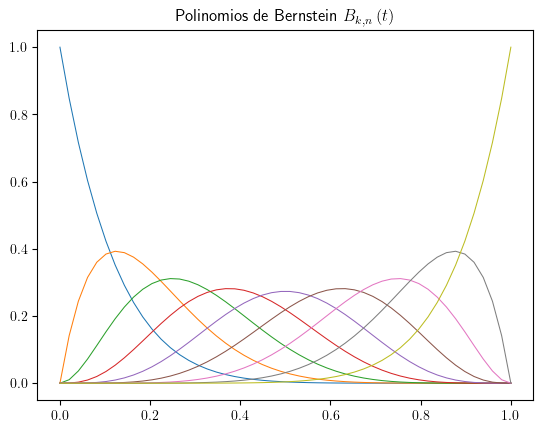

In [4]:
plot_bernstein(n=8)

In [5]:
def bernstein_generalized(t: np.array, a: int, b: int, k: int, n: int):
    """Retorna la evaluación de B_{k,n}(a, b, t)."""
    from math import comb

    assert a < b, "a debe ser menor que b."
    assert k in range(n + 1), "k debe pertenecer a \left[0, n\right] \cap \mathbb{Z}."
    assert np.all(t >= a) and np.all(
        t <= b
    ), "t debe estar en el intervalo \left[a, b\right]."

    return comb(n, k) * ((t - a) ** k * (b - t) ** (n - k)) / (b - a) ** n

In [6]:
def plot_bernstein_generalized(a: float, b: float, n: int):
    """Grafica los polinomios de Bernstein generalizados desde k=0,\dotsc,n."""
    t = np.linspace(start=a, stop=b)

    for k in range(n + 1):
        plt.plot(t, bernstein_generalized(t=t, a=a, b=b, k=k, n=n))

    plt.title(r"Polinomios de Bernstein $B_{k, n}\left(a, b, t\right)$")

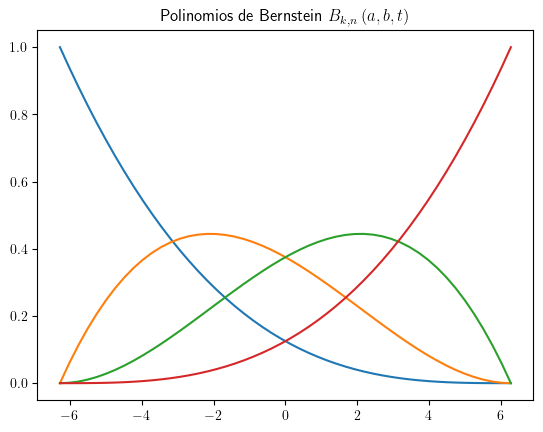

In [7]:
plot_bernstein_generalized(a=-2 * np.pi, b=2 * np.pi, n=3)

Para resolver la pregunta definimos el $n$-ésimo polinomio de Bernstein de la función $f$ como
$$
B_{n}\left(f, x\right)=
\sum_{k=0}^{n}
f\left(\frac{k}{n}\right)
\binom{n}{k}
x^{k}{\left(1-x\right)}^{n-k}.
$$

In [8]:
def bernstein_f(t: np.array, f: Callable, n: int):
    from math import comb

    b = 0
    for k in range(n + 1):
        b = b + f(k / n) * comb(n, k) * t**k * (1 - t) ** (n - k)
    return b

In [9]:
def plot_weierstrass(f: Callable, numbers: list):
    x = np.linspace(0, 1)
    y = f(x)

    plt.plot(x, y, "r", label=r"$\cos(x)$")

    for number in numbers:
        plt.plot(x, bernstein_f(t=x, f=f, n=number), label=f"$B_{number}$")

    plt.grid()
    plt.legend()
    plt.title("Aproximando la función coseno por polinomios de Bernstein")

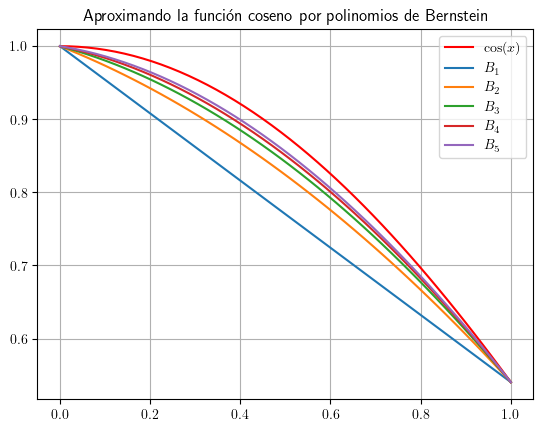

In [10]:
plot_weierstrass(f=np.cos, numbers=[1, 2, 3, 4, 5])

2. Implementar el algoritmo de Casteljou para graficar la respectiva curva de Bezier.

## Primer ejemplo en 2D

In [11]:
def casteljau_numpy(points: np.array, t: float):
    while len(points) > 1:
        print("###############")
        points = (1 - t) * points[:-1] + t * points[1:]
        print(points)
    return points[0]

In [12]:
control_points = np.array([[0, 0], [0, 2], [8, 2], [4, 0]])

In [13]:
print(control_points)

[[0 0]
 [0 2]
 [8 2]
 [4 0]]


In [14]:
casteljau_numpy(points=control_points, t=0.5)

###############
[[0. 1.]
 [4. 2.]
 [6. 1.]]
###############
[[2.  1.5]
 [5.  1.5]]
###############
[[3.5 1.5]]


array([3.5, 1.5])

## Segundo ejemplo en 2D

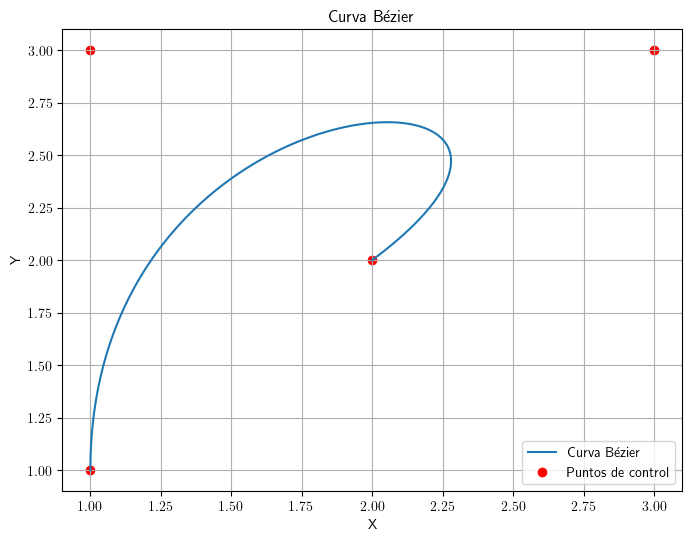

In [15]:
control_points = np.array(
    [
        [1, 1],
        [1, 3],
        [3, 3],
        [2, 2],
    ]
)


def casteljau_numpy(points, t):
    while len(points) > 1:
        points = (1 - t) * points[:-1] + t * points[1:]
    return points[0]


# Valores de parámetro t (entre 0 y 1)
t_values = np.linspace(0, 1, 100)  # Generamos 100 valores de t entre 0 y 1

# Calcular puntos en la curva Bézier para cada valor de t
curve_points = np.array([casteljau_numpy(control_points.copy(), t) for t in t_values])

# Extraer las coordenadas x e y de los puntos en la curva
x_curve = curve_points[:, 0]
y_curve = curve_points[:, 1]

# Graficar la curva Bézier
plt.figure(figsize=(8, 6))
plt.plot(x_curve, y_curve, label="Curva Bézier")
plt.scatter(
    control_points[:, 0], control_points[:, 1], c="red", label="Puntos de control"
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Curva Bézier")
plt.legend()
plt.grid(True)
plt.show()

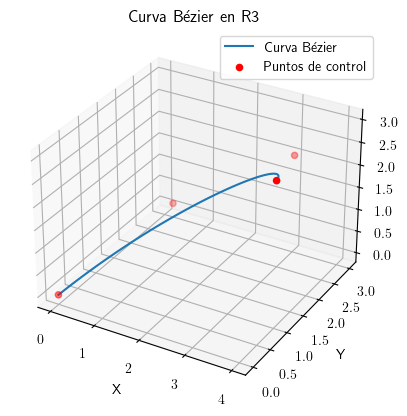

In [16]:
# Puntos de control como un arreglo NumPy de coordenadas n-dimensionales
control_points = np.array(
    [[0, 0, 0], [1, 2, 1], [3, 3, 2], [4, 1, 3]]  # P0  # P1  # P2  # P3
)

# Valores de parámetro t (entre 0 y 1)
t_values = np.linspace(0, 1, 100)

# Calcular puntos en la curva Bézier para cada valor de t
curve_points = np.array([casteljau_numpy(control_points.copy(), t) for t in t_values])

# Extraer las coordenadas x, y, z de los puntos en la curva (solo para R3)
x_curve = curve_points[:, 0]
y_curve = curve_points[:, 1]
z_curve = curve_points[:, 2]

# Graficar la curva Bézier en R3
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_curve, y_curve, z_curve, label="Curva Bézier")
ax.scatter(
    control_points[:, 0],
    control_points[:, 1],
    control_points[:, 2],
    c="red",
    label="Puntos de control",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Curva Bézier en R3")
ax.legend()
plt.show()